In [1]:
is_notebook = True

In [2]:
import numpy as np
from scipy.interpolate import interpn
import utils

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
import matplotlib_inline

In [4]:
# save the figure using svg format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# the svg format figure will not render text as paths, but embed the font as text
plt.rcParams['svg.fonttype'] = 'none'

# change default font for all plots
plt.rcParams['font.family'] ='sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 14

# change other settings to ease the work in Adobe Illustrator
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.pad']='6' # spacing between axes to x ticks, this also includes spacing between label and ticks
plt.rcParams['ytick.major.pad']='6' # spacing between axes to y ticks

In [5]:
if is_notebook:
    %matplotlib widget

In [6]:
# import plot functions
from utils import genFigures as gf

## Fig 5a

In [7]:
data_path = './Experiment_data/'
save_to_path = './Experiment_results/'

In [8]:
kernels = ['prewitt_horizontal_up', 'sobel_horizontal_up', 'sharpen_D4']
channels = ['Reds', 'Greens', 'Blues']

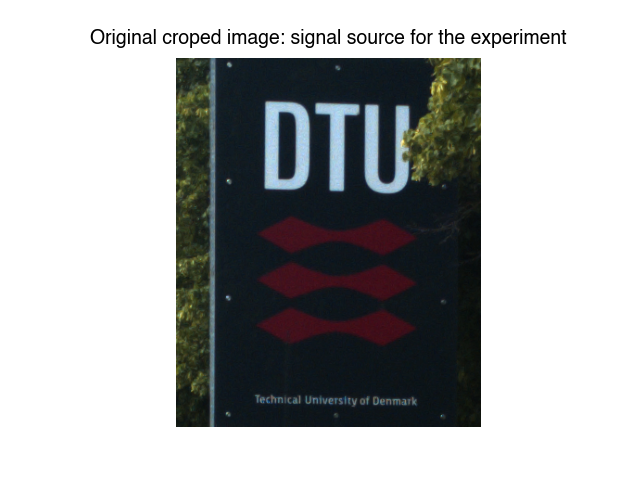

In [9]:
# Read the croped original image 
# See next cell for "how to process the original dng file"
with open('./HDR_image/DTU_16bit_RGB.bin', 'rb') as file:
    original_image = utils.bytes_to_data(file.read(), is_binary=0, output_format='uint16')

original_image = np.reshape(original_image, [397+2, 327+2, 3])

# We will use a croped image from the original image
# Pixels will be normalized
# The image will be processed through a "ADC" process to limit to discrete/integer pixel values from 0 to 65535
plt.close(102)
plt.figure(102)
# Color clamp and normalization is a MUST to "see" the 16-bit image
color_reduced_image = np.fix(original_image.astype(float) / 255.0)
image_to_show = (color_reduced_image - np.min(color_reduced_image)) / (np.max(color_reduced_image) - np.min(color_reduced_image))
imgplot=plt.imshow(image_to_show, vmin=0,vmax=1)
plt.axis('off')
plt.title("Original croped image: signal source for the experiment")
save_file_path = save_to_path + 'Figure5a_DTU_original_croped_naive_colorClamp.png'
plt.imsave(save_file_path, image_to_show, format='png')

In [10]:
# # Show and plot the original image
# # NOTE: crop is implemented to the dng file to reduce the size of the data
# # NOTE: original processing method to read dng file into 16-bit 3D array:
# #       img = imageio.imread(img_path, format='RAW-FI')
# # This does not work on MacOS, due to the lack of libraw or probably other libraries.
# # There is still no rawpy package wheel available for arm64 architecture yet.
# #
# # Read the converted bin file for the 16-bit image (done in Windows)
# with open('./HDR_image/DTU_origin_16bit.bin', 'rb') as file:
#     original_image = utils.bytes_to_data(file.read(), is_binary=0, output_format='uint16')
    
# original_image = np.reshape(original_image, [4608, 3456, 3])

# # apply the crop
# image_cropBoundary = [1801, 2200, 1521, 1850]

# croped_original_image = original_image[image_cropBoundary[0]:image_cropBoundary[1],image_cropBoundary[2]:image_cropBoundary[3],::]

In [11]:
# plt.close(101)
# plt.figure(101)
# # Normalization is a MUST to "see" the 16-bit image
# # NOTE: 
# # To see the image in a correct colorscale, appropriate color clamp is requried
# # perhaps even during the dng file reading process.
# # Here is just to show that the image is there
# color_reduced_image = np.fix(original_image.astype(float) / 255.0)
# image_to_show = (color_reduced_image - np.min(color_reduced_image)) / (np.max(color_reduced_image) - np.min(color_reduced_image))
# imgplot=plt.imshow(image_to_show, vmin=0,vmax=1)
# plt.axis('off')
# plt.title("Original image")

# # We will use a croped image from the original image
# # Pixels will be normalized
# # The image will be processed through a "ADC" process to limit to discrete/integer pixel values from 0 to 65535
# plt.close(102)
# plt.figure(102)
# # Color clamp and normalization is a MUST to "see" the 16-bit image
# color_reduced_image = np.fix(croped_original_image.astype(float) / 255.0)
# image_to_show = (color_reduced_image - np.min(color_reduced_image)) / (np.max(color_reduced_image) - np.min(color_reduced_image))
# imgplot=plt.imshow(image_to_show, vmin=0,vmax=1)
# plt.axis('off')
# plt.title("Original croped image: signal source for the experiment")
# save_file_path = save_to_path + './Figure5a_DTU_original_croped_naive_colorClamp.png'
# plt.imsave(save_file_path, image_to_show, format='png')

In [12]:
# Save each image independently
# Save to png file to preserve the original size
for current_kernel in kernels:
    channel_count = 0
    for current_channel in channels:
        # e.g., DSO_sortresult_DTU_prewitt_horizontal_up_Reds_16_bits_experiment_reconstruct
        data_file = 'DSO_sortresult_DTU_'+current_kernel+'_'+current_channel+'_16_bits_experiment_reconstruct.bin'
        
        with open(data_path + data_file, 'rb') as file:
            buffer = file.read()
        
        print('Results ' + data_file + ' loaded.')
        
        result = np.frombuffer(buffer)
        
        # reshape the data to the image
        image_data = np.reshape(result, [397, 327])  # Adjust dimensions as needed
        
        # plot the image without axes
        plt.figure()
        ax_5a = plt.imshow(image_data, cmap=current_channel)
        plt.axis('off')  # Turn off axes
        channel_count += 1
    
        # Save the figure as SVG without white padding
        save_file_path = save_to_path + './figure5a' + '_' + current_kernel + '_' + current_channel + '.png'
        # plt.savefig(save_file_path, format='svg', bbox_inches='tight', pad_inches=0)
        plt.imsave(save_file_path, image_data, cmap=current_channel, format='png')
        plt.close()

Results DSO_sortresult_DTU_prewitt_horizontal_up_Reds_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_prewitt_horizontal_up_Greens_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_prewitt_horizontal_up_Blues_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sobel_horizontal_up_Reds_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sobel_horizontal_up_Greens_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sobel_horizontal_up_Blues_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sharpen_D4_Reds_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sharpen_D4_Greens_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sharpen_D4_Blues_16_bits_experiment_reconstruct.bin loaded.


Results DSO_sortresult_DTU_prewitt_horizontal_up_Reds_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_prewitt_horizontal_up_Greens_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_prewitt_horizontal_up_Blues_16_bits_experiment_reconstruct.bin loaded.


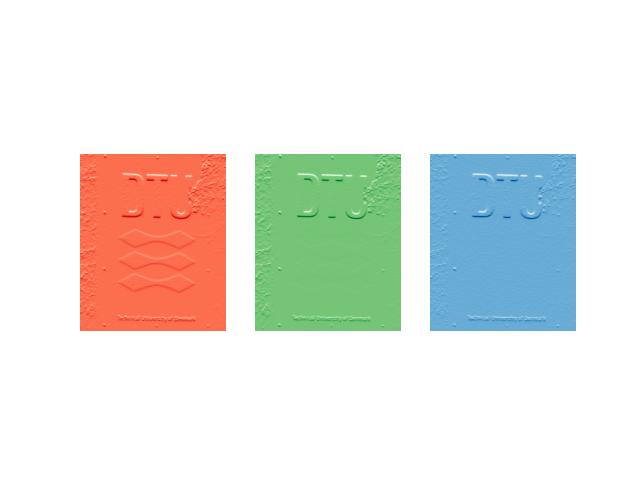

Results DSO_sortresult_DTU_sobel_horizontal_up_Reds_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sobel_horizontal_up_Greens_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sobel_horizontal_up_Blues_16_bits_experiment_reconstruct.bin loaded.


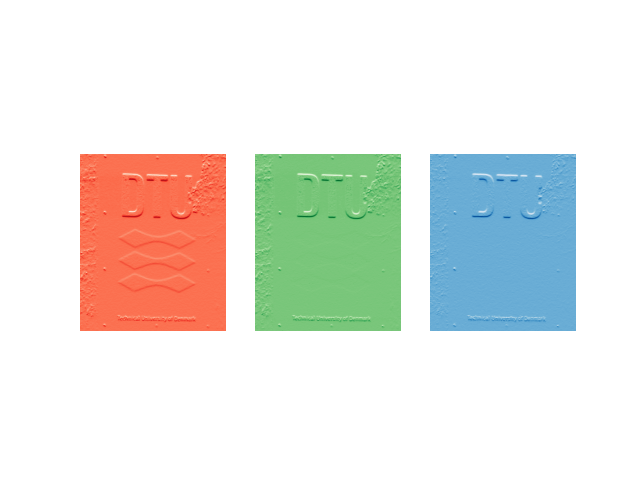

Results DSO_sortresult_DTU_sharpen_D4_Reds_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sharpen_D4_Greens_16_bits_experiment_reconstruct.bin loaded.
Results DSO_sortresult_DTU_sharpen_D4_Blues_16_bits_experiment_reconstruct.bin loaded.


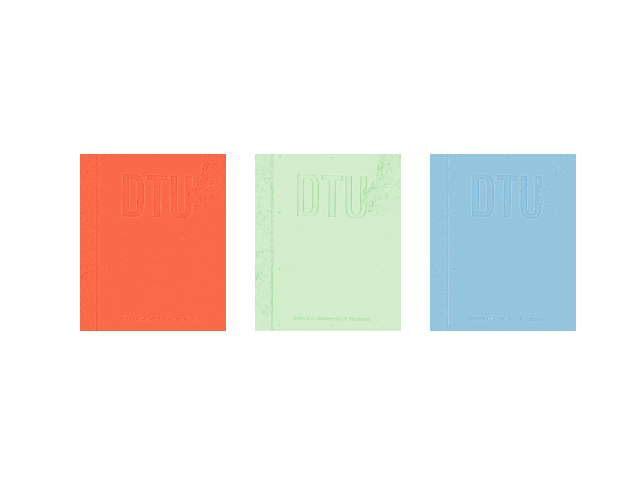

In [13]:
# Group images according to kernels and show
for current_kernel in kernels:
    plt.figure()
    channel_count = 0
    for current_channel in channels:
        # e.g., DSO_sortresult_DTU_prewitt_horizontal_up_Reds_16_bits_experiment_reconstruct
        data_file = 'DSO_sortresult_DTU_'+current_kernel+'_'+current_channel+'_16_bits_experiment_reconstruct.bin'
        
        with open(data_path + data_file, 'rb') as file:
            buffer = file.read()
        
        print('Results ' + data_file + ' loaded.')
        
        result = np.frombuffer(buffer)
        
        # reshape the data to the image
        image_data = np.reshape(result, [397, 327])  # Adjust dimensions as needed
        
        # plot the image without axes
        plt.subplot(1, 3, channel_count+1)
        ax_5a = plt.imshow(image_data, cmap=current_channel)
        plt.axis('off')  # Turn off axes
        channel_count += 1
    
    # # Save the figure as SVG without white padding
    # save_file_path = save_to_path + './figure5a' + '_' + current_kernel + '.svg'
    # plt.savefig(save_file_path, format='svg', bbox_inches='tight', pad_inches=0)
    
    plt.show()

## Fig 5b

In [14]:
data_file = 'DSO_sortresult_DTU_prewitt_horizontal_up_Blues_16_bits_experiment_reconstruct.bin'
expected_data_file = 'DSO_sortresult_DTU_prewitt_horizontal_up_Blues_16_bits_PC_reconstruct.bin'

In [15]:
with open(data_path+data_file, 'rb') as file:
        buffer = file.read()
file.close()
print('Results ' +data_file + ' loaded.')
result = np.frombuffer(buffer)

with open(data_path+expected_data_file, 'rb') as file:
        buffer = file.read()
file.close()
print('Expected results ' +expected_data_file + ' loaded.')
genie_result = np.frombuffer(buffer)

Results DSO_sortresult_DTU_prewitt_horizontal_up_Blues_16_bits_experiment_reconstruct.bin loaded.
Expected results DSO_sortresult_DTU_prewitt_horizontal_up_Blues_16_bits_PC_reconstruct.bin loaded.


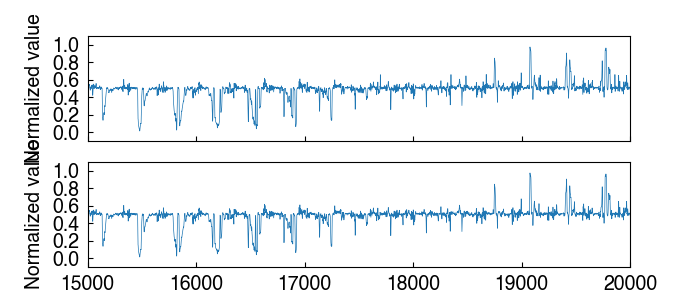

In [16]:
fig_5b, _ = gf.plot_waveform_comparison(result, genie_result)

In [17]:
fig_5b.get_figure().savefig(save_to_path+'./figure5b.svg', format='svg', bbox_inches='tight')

## Fig 5c

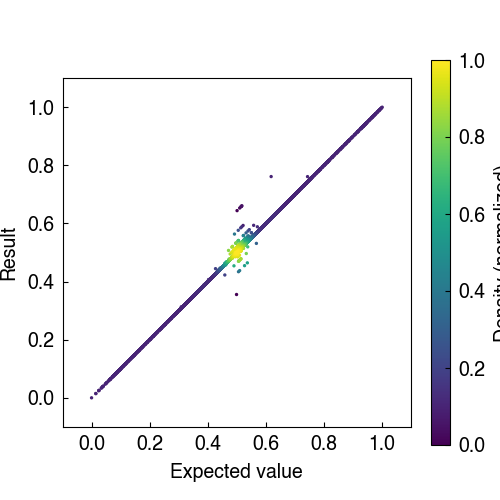

In [18]:
ax_5c = gf.plot_density_scatter(genie_result, result, dot_size=2, bins=11, cmap='viridis', rasterized=True)

In [19]:
ax_5c.get_figure().savefig(save_to_path+'./figure5c.svg', format='svg', bbox_inches='tight')

## Fig 5d

Maximum probability is: 0.99851331.
Sum of all probability is: 1.000 (Expected to be 1).


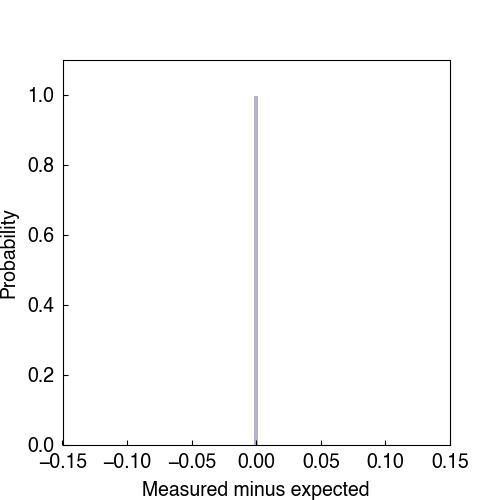

In [20]:
ax_5d = gf.plot_noise_dist(result, genie_result, scheme='DSO', bins=101)

In [21]:
ax_5d.get_figure().savefig(save_to_path+'./figure5d.svg', format='svg', bbox_inches='tight')

## Fig 5e

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv(data_path+'Laser source OSNR_ER.csv',
        header=0, delimiter=";", decimal=",")

In [24]:
df

,OSNR,ER
0,35.04480,0.000027
1,33.07420,0.000081
2,31.06725,0.000295
3,29.00665,0.000713
4,27.02135,0.007280
5,25.01020,0.020480
6,23.03790,0.050010
7,21.02540,0.187770
8,19.02760,0.330780
9,17.01205,0.472600


In [25]:
OSNR = df['OSNR'].to_numpy()
PER = df['ER'].to_numpy()

Fitting Method: logarithmic_fit
Fitted Parameters: [  8.14624714 -24.43913759]


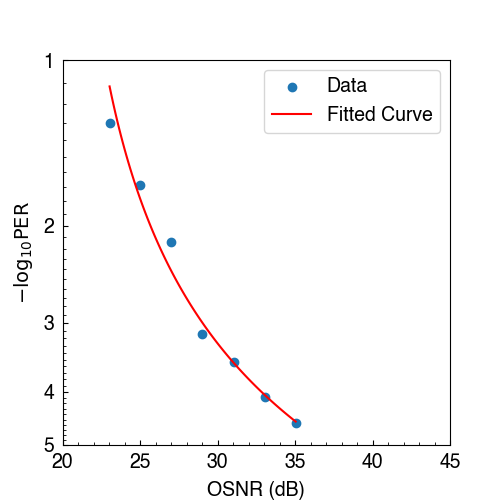

In [26]:
x = OSNR[:-5:][::-1]
y = -np.log10(PER[:-5:])[::-1]

# Define the fitting function (e.g., a logarithmic function)
def logarithmic_fit(x, a, b):
    return a * np.log(x) + b
    
fitting_params, ax_5e = gf.plot_PER_measurements(
    x,y, logarithmic_fit, yticks=np.arange(5,0.9,-1), yticks_minor=np.arange(5,0.9,-0.1),
    xticks=np.arange(20,50,5), xticks_minor=np.arange(20,50,1),
    xlabel='OSNR (dB)', ylabel = r'$-\mathrm{log}_{10}\mathrm{PER}$'
    )

In [27]:
ax_5e.get_figure().savefig(save_to_path+'./figure5e.svg', format='svg', bbox_inches='tight')

Results DSO_sortresult_Chelsea_Prewitt_horizontal_up_Grey_experiment_reconstruct.bin loaded.


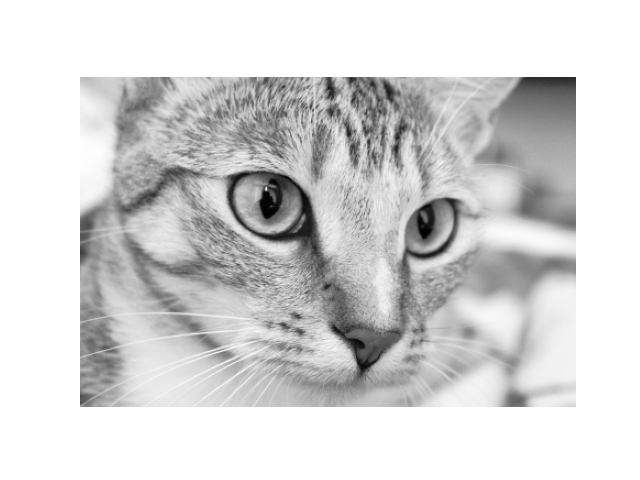

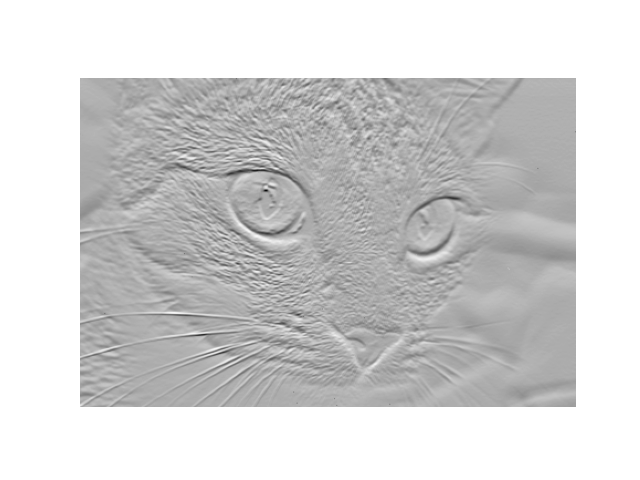

In [28]:
from skimage import data, color

# Load Chelsea image
chelsea = data.chelsea()

# Or, use the following for experiment use
# data_file = 'DSO_sortresult_Chelsea_raw_image.bin'
# with open(data_path + data_file, 'rb') as file:
#     buffer = file.read()
# print('Results ' + data_file + ' loaded.')
# result = np.frombuffer(buffer)
# # reshape the data to the image
# image_data = np.reshape(chelsea_gray, [300, 451])  # original size

# flat the image into gray (to be processed)
chelsea_gray = color.rgb2gray(chelsea)

# plot the image without axes
plt.figure()
ax_5e_org = plt.imshow(chelsea_gray, cmap='Greys_r')
plt.axis('off')  # Turn off axes

# Save the figure as SVG without white padding
save_file_path = save_to_path + './figure5e_org.svg'
plt.savefig(save_file_path, format='svg', bbox_inches='tight', pad_inches=0)

data_file = 'DSO_sortresult_Chelsea_Prewitt_horizontal_up_Grey_experiment_reconstruct.bin'

with open(data_path + data_file, 'rb') as file:
    buffer = file.read()

print('Results ' + data_file + ' loaded.')

result = np.frombuffer(buffer)

# reshape the data to the image
image_data = np.reshape(result, [300-2, 451-2])  # No padding, only grey channel processed

# plot the image without axes
plt.figure()
ax_5e_processed = plt.imshow(image_data, cmap='Greys')
plt.axis('off')  # Turn off axes

# Save the figure as SVG without white padding
save_file_path = save_to_path + './figure5e_processed.svg'
plt.savefig(save_file_path, format='svg', bbox_inches='tight', pad_inches=0)

## Fig 5g

In [29]:
import utils

# retrieve the data
MNIST_data_true = 'MNIST_true'
MNIST_data_PC_pred = 'MNIST_PC_pred'
MNIST_data_exp_pred = 'MNIST_exp_pred'

with open(data_path + MNIST_data_true, 'rb') as file:
    y_true = utils.bytes_to_data(file.read(), is_binary=0, output_format='int')
with open(data_path + MNIST_data_PC_pred, 'rb') as file:
    y_PC_pred = utils.bytes_to_data(file.read(), is_binary=0, output_format='int')
with open(data_path + MNIST_data_exp_pred, 'rb') as file:
    y_exp_pred = utils.bytes_to_data(file.read(), is_binary=0, output_format='int')

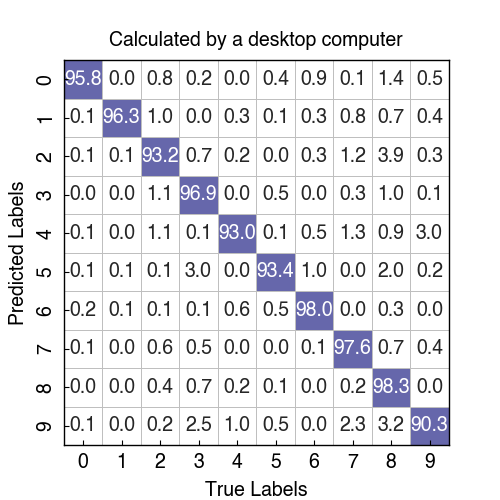

In [30]:
# PC confusion matrix
outer_rect_kwargs = {'title': 'Calculated by a desktop computer'}
plt.rcParams['axes.titlepad'] = 10
heatmap = gf.plot_confusion_matrix(
    y_true, y_PC_pred, precision='.1f',outer_linewidth = 1,
    inner_linewidth = 2,
    outer_linecolor = '#000000',
    inner_linecolor = '#BFBFBF',
    outer_rect_kwargs = outer_rect_kwargs)
heatmap.get_figure().savefig(save_to_path+'./figure5g_PC.svg', format='svg', bbox_inches='tight')

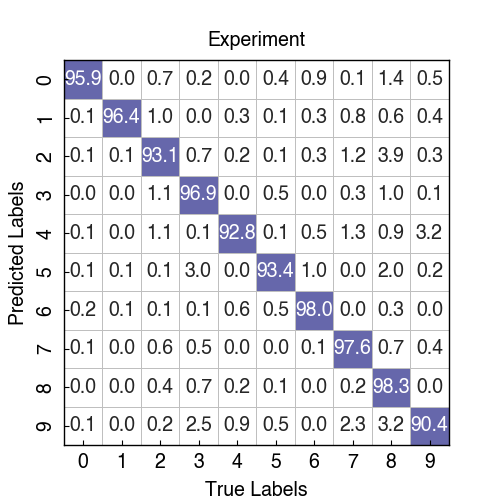

In [31]:
# Experiment confusion matrix
outer_rect_kwargs = {'title': 'Experiment'}
plt.rcParams['axes.titlepad'] = 10
heatmap = gf.plot_confusion_matrix(
    y_true, y_exp_pred, precision='.1f',outer_linewidth = 1,
    inner_linewidth = 2,
    outer_linecolor = '#000000',
    inner_linecolor = '#BFBFBF',
    outer_rect_kwargs = outer_rect_kwargs)
heatmap.get_figure().savefig(save_to_path+'./figure5g_exp.svg', format='svg', bbox_inches='tight')

In [32]:
# Test code

# # Generate random y_true values (for demonstration)
# np.random.seed(42)  # Set seed for reproducibility
# n_samples = 1000
# n_classes = 10  # Number of classes
# y_true = np.random.randint(0, n_classes, n_samples)  # True labels (random integers from 0 to n_classes-1)

# # Define error rate percentage (ER)
# error_rate = 10  # Example: 10% error rate

# # Calculate the number of incorrect predictions based on ER percentage
# num_errors = int(n_samples * (error_rate / 100))

# # Create random indices to change predicted values and introduce errors
# error_indices = np.random.choice(n_samples, num_errors, replace=False)

# # Copy y_true to create y_pred
# y_pred = y_true.copy()

# # Introduce errors by changing predicted values at the selected indices
# for index in error_indices:
#     new_value = np.random.randint(0, n_classes)  # Random incorrect prediction
#     while new_value == y_true[index]:
#         new_value = np.random.randint(0, n_classes)  # Ensure it's different from true value
#     y_pred[index] = new_value

# # Use the modified y_pred and y_true as inputs to the plot_confusion_matrix function
# outer_rect_kwargs = {'title': 'Calculated by a desktop computer'}
# plt.rcParams['axes.titlepad'] = 10
# heatmap = gf.plot_confusion_matrix(
#     y_true, y_pred,precision='.1f',outer_linewidth = 1,
#     inner_linewidth = 2,
#     outer_linecolor = '#000000',
#     inner_linecolor = '#BFBFBF',
#     outer_rect_kwargs = outer_rect_kwargs)